In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
train.head()

,building_id,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,...,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN,total_price
0,e3mMIMR3JJqCaXz1,8,21,18674,4,3,2,6271,2,NaN,...,58,1,157,1,2483,1,6011,1,34.469803,6.476038e+05
1,LgwzgklNvy4QCtq5,8,7,18800,5,1,2,7885,2,NaN,...,28,1,115,1,15872,1,32221,1,40.073573,3.321452e+06
2,ucIR2NLLsC3T650L,8,7,19289,4,1,2,6028,2,NaN,...,78,1,212,1,15760,1,32228,1,54.462081,9.570885e+06
3,jre1pJhcQj91Kdky,8,21,20385,24,0,2,18325,0,NaN,...,20,1,125,1,2568,1,7271,1,99.628966,1.421501e+07
4,rQpYpY9nRG7X5mmr,1,21,20657,2,4,2,6880,2,NaN,...,18,1,47,1,2587,1,7442,1,124.131236,7.627120e+05


In [3]:
s = ""
for col in train.columns:
    s += col + ' , '
s

'building_id , building_material , city , txn_dt , total_floor , building_type , building_use , building_complete_dt , parking_way , parking_area , parking_price , txn_floor , land_area , building_area , town , lat , lon , village_income_median , town_population , town_area , town_population_density , doc_rate , master_rate , bachelor_rate , jobschool_rate , highschool_rate , junior_rate , elementary_rate , born_rate , death_rate , marriage_rate , divorce_rate , village , N_50 , N_500 , N_1000 , N_5000 , N_10000 , I_10 , I_50 , I_index_50 , I_100 , I_250 , I_500 , I_index_500 , I_1000 , I_index_1000 , I_5000 , I_index_5000 , I_10000 , I_index_10000 , I_MIN , II_10 , II_50 , II_index_50 , II_100 , II_250 , II_500 , II_index_500 , II_1000 , II_index_1000 , II_5000 , II_index_5000 , II_10000 , II_index_10000 , II_MIN , III_10 , III_50 , III_index_50 , III_100 , III_250 , III_500 , III_index_500 , III_1000 , III_index_1000 , III_5000 , III_index_5000 , III_10000 , III_index_10000 , III_MIN

In [4]:
test = pd.read_csv('test.csv')
test.head()

,building_id,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,...,XIV_250,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN
0,X5gsdTWGS3W7JJQB,1,13,18634,2,4,2,1857,2,NaN,...,7,21,1,129,1,3991,1,8409,1,105.462231
1,BTshNOJyKHnT2YIT,8,7,20199,10,3,2,16011,2,NaN,...,18,44,1,67,1,1950,1,10725,1,100.819809
2,dhdymr0lV8N5kZOT,8,12,19769,4,4,10,18294,2,NaN,...,0,3,1,35,1,3707,1,19459,1,259.800543
3,VEwyGGMcD56w5BOc,10,7,20479,19,2,0,17837,2,NaN,...,16,60,1,144,1,6487,1,29400,1,22.941906
4,wmUeMoJZfsqaSX9b,8,3,18164,13,0,2,13272,2,NaN,...,4,18,1,76,1,1346,1,3280,1,181.213095


In [5]:
all_data = pd.concat((train.loc[:,'building_material':'XIV_MIN'],
                      test.loc[:,'building_material':'XIV_MIN']))

In [6]:
all_data.head()

,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,parking_price,...,XIV_250,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN
0,8,21,18674,4,3,2,6271,2,NaN,NaN,...,21,58,1,157,1,2483,1,6011,1,34.469803
1,8,7,18800,5,1,2,7885,2,NaN,NaN,...,7,28,1,115,1,15872,1,32221,1,40.073573
2,8,7,19289,4,1,2,6028,2,NaN,NaN,...,27,78,1,212,1,15760,1,32228,1,54.462081
3,8,21,20385,24,0,2,18325,0,NaN,81138.889762,...,2,20,1,125,1,2568,1,7271,1,99.628966
4,1,21,20657,2,4,2,6880,2,NaN,NaN,...,2,18,1,47,1,2587,1,7442,1,124.131236


In [7]:
df1 = all_data[all_data['parking_area'].notnull()]
df1[df1['parking_price'].isnull()]

,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,parking_price,...,XIV_250,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN


### * The item that has parking_area also has parking price in the current data set *

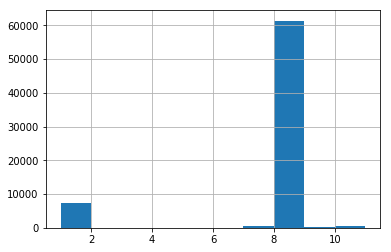

In [8]:

df2 = all_data['building_material']
df2.hist()

In [9]:
# bm_dict = {}
# for i in range(df2.min(),df2.max() + 1):
#     bm_dict[i]=0
# for itm in df2.values:
#     bm_dict[itm] += 1
# bm_dict

## type 2 and 6 never show in this dataset

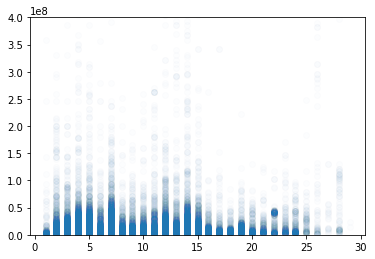

In [10]:
df3 = train[['total_floor','total_price']]
plt.ylim(0, 4e8)
plt.scatter(x=df3['total_floor'],y=df3['total_price'],alpha = 0.01)

In [11]:
all_data.columns[all_data.isna().any()]

Index(['parking_area', 'parking_price', 'txn_floor', 'village_income_median'], dtype='object')

In [12]:
all_data['txn_floor']

0        3.0
1        5.0
2        1.0
3       13.0
4        NaN
5        4.0
6        8.0
7        4.0
8        1.0
9        2.0
10       NaN
11       NaN
12       7.0
13       3.0
14       9.0
15       NaN
16       1.0
17       5.0
18       7.0
19       1.0
20       5.0
21       NaN
22       NaN
23       4.0
24       4.0
25       8.0
26       3.0
27       4.0
28       NaN
29       4.0
        ... 
9970    12.0
9971     5.0
9972     NaN
9973     NaN
9974     NaN
9975     4.0
9976     4.0
9977    11.0
9978     NaN
9979     4.0
9980     2.0
9981    25.0
9982     7.0
9983    12.0
9984     NaN
9985     4.0
9986     3.0
9987     5.0
9988     2.0
9989     1.0
9990     NaN
9991     9.0
9992     7.0
9993     6.0
9994    10.0
9995     4.0
9996     2.0
9997     NaN
9998     2.0
9999     6.0
Name: txn_floor, Length: 70000, dtype: float64

In [13]:
all_data.shape

(70000, 233)

In [14]:
all_data['txn_floor'].mode()

0    4.0
dtype: float64

In [15]:
all_data['txn_floor'].fillna(all_data['txn_floor'].mode()[0], inplace=True)
all_data['txn_floor']

0        3.0
1        5.0
2        1.0
3       13.0
4        4.0
5        4.0
6        8.0
7        4.0
8        1.0
9        2.0
10       4.0
11       4.0
12       7.0
13       3.0
14       9.0
15       4.0
16       1.0
17       5.0
18       7.0
19       1.0
20       5.0
21       4.0
22       4.0
23       4.0
24       4.0
25       8.0
26       3.0
27       4.0
28       4.0
29       4.0
        ... 
9970    12.0
9971     5.0
9972     4.0
9973     4.0
9974     4.0
9975     4.0
9976     4.0
9977    11.0
9978     4.0
9979     4.0
9980     2.0
9981    25.0
9982     7.0
9983    12.0
9984     4.0
9985     4.0
9986     3.0
9987     5.0
9988     2.0
9989     1.0
9990     4.0
9991     9.0
9992     7.0
9993     6.0
9994    10.0
9995     4.0
9996     2.0
9997     4.0
9998     2.0
9999     6.0
Name: txn_floor, Length: 70000, dtype: float64

In [16]:
all_data[all_data['village_income_median'].isnull()][['village']]

,village
116,1131
249,881
343,3114
428,523
433,2001
438,756
474,2277
603,1151
714,493
749,2618


In [17]:
all_data[all_data['village'] == 1131][['town']]

,town
116,84
4305,84
7601,84
8151,84
12695,84
16289,84
21390,84
23884,84
29646,84
31705,84


In [18]:
all_data[all_data['town'] == 84][['village_income_median']]

,village_income_median
6,716.0
10,560.0
23,589.0
116,NaN
119,553.0
137,568.0
364,554.0
489,588.0
506,534.0
508,614.0


In [19]:
std = all_data.groupby('town', as_index=False)['village_income_median'].std().values
mean = all_data.groupby('town', as_index=False)['village_income_median'].mean().values
std_percent = std[:,1]/mean[:,1]
std_percent[std_percent > 0.2]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


array([0.22064696, 0.2016842 , 0.21100746, 0.20676009, 0.30560652,
       0.20629473])

## Conclusion: ignore column 'village_income_median'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4dd21f45c0>,
      dtype=object)

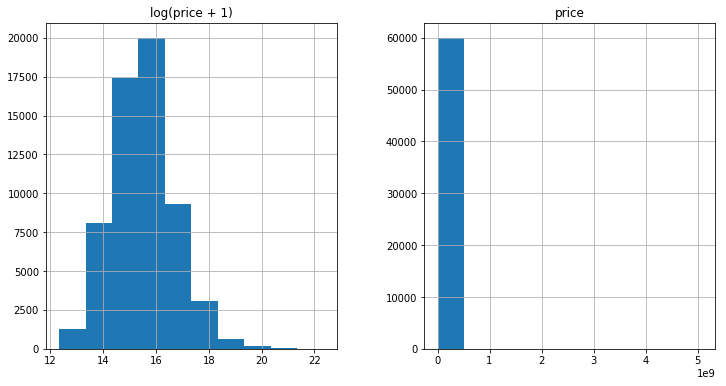

In [20]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["total_price"], "log(price + 1)":np.log1p(train["total_price"])})
prices.hist()